In [113]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
color = sns.color_palette()
import matplotlib.mlab as mlab
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
import os
#os.chdir('/')

## Loading our final datasets

In [115]:
final_state_data = pd.read_csv('./final_data_states.csv')
#final_industry_data = pd.read_csv('Data and Preprocessing/Data/industry_allyear.csv')
#final_state_industry_data = pd.read_csv('Data and Preprocessing/Data/Codes.csv')


In [116]:
contract_establish = final_state_data['contract_establish']
end_establish = final_state_data['end_establish']
expand_establish = final_state_data['expand_establish']
net_change = final_state_data['net_change']
open_establish = final_state_data['open_establish']
total_contract = final_state_data['total_contract']
total_expand = final_state_data['total_expand']


In [117]:
final_state_data = final_state_data.drop(['Unnamed: 0'], axis=1)


In [118]:
extra_data1=pd.read_csv('./extra_feature1.csv')
extra_data2=pd.read_csv('./extra_feature2.csv')
extra_data=pd.merge(extra_data1,extra_data2,on=['year','state'],how='outer')
final_state_data=pd.merge(final_state_data,extra_data,on=['year','state'],how='left')
final_state_data=final_state_data.fillna(final_state_data.mean())

In [119]:
extra_data.shape

(1377, 25)

In [120]:
column_description = pd.DataFrame(final_state_data.dtypes)
column_description.head(15)

,0
GeoName,object
year,int64
Gross domestic product (GDP) by state,float64
Quantity indexes for real GDP by state,float64
Real GDP by state,float64
pce Clothing and footwear,float64
pce Food and beverages purchased for off-premises consumption,float64
pce Furnishings and durable household equipment,float64
pce Gasoline and other energy goods,float64
pce Motor vehicles and parts,float64


_______________

## Start by separating the features with the targets

In [121]:
features = final_state_data.drop(['contract_establish', 'end_establish', 'expand_establish', 
                                  'net_change','open_establish', 'total_contract',
                                  'total_expand', 'GeoName','year', 'state', 'Top Industry'], axis=1)

## Explore how the features are correlated to the target

In [122]:

correlation = final_state_data.select_dtypes(include=[np.number]).corr()

In [123]:
correlation_target = correlation[['contract_establish','end_establish', 'expand_establish', 'net_change', 'open_establish', 
             'total_contract', 'total_expand' ]]

In [124]:
corr_contract_establish = pd.DataFrame(correlation_target['contract_establish'].loc[
    correlation_target['contract_establish'] > 0.95].sort_values(ascending=False))
print(corr_contract_establish)

                                   contract_establish
contract_establish                           1.000000
total_contract                               0.998525
expand_establish                             0.991177
total_expand                                 0.990913
Wage and salary employment                   0.985066
Population (persons)                         0.981079
Resident Population in                       0.980523
Total employment                             0.980067
Total employment (number of jobs)            0.980067
open_establish                               0.971668
end_establish                                0.970211
Real GDP by state                            0.964467


In [125]:
corr_end_establish = pd.DataFrame(correlation_target['end_establish'].loc[
    correlation_target['end_establish'] > 0.9].sort_values(ascending=False))
print(corr_end_establish)

                                   end_establish
end_establish                           1.000000
open_establish                          0.993701
total_contract                          0.981933
total_expand                            0.977108
contract_establish                      0.970211
expand_establish                        0.967299
Veterans' life insurance benefits       0.948621
Population (persons)                    0.935398
Wage and salary employment              0.934724
Resident Population in                  0.933961
Total employment                        0.927428
Total employment (number of jobs)       0.927428
Monetary interest receipts              0.916698
Real GDP by state                       0.908059
Personal interest income                0.907338


In [126]:
corr_expand_establish = pd.DataFrame(correlation_target['expand_establish'].loc[
    correlation_target['expand_establish'] > 0.95].sort_values(ascending=False))
print(corr_expand_establish)

                                   expand_establish
expand_establish                           1.000000
total_expand                               0.998852
contract_establish                         0.991177
total_contract                             0.990981
Wage and salary employment                 0.985780
Population (persons)                       0.982500
Total employment                           0.981720
Total employment (number of jobs)          0.981720
Resident Population in                     0.981623
open_establish                             0.976339
end_establish                              0.967299
Real GDP by state                          0.965467


In [127]:
corr_open_establish = pd.DataFrame(correlation_target['open_establish'].loc[
    correlation_target['open_establish'] > 0.9].sort_values(ascending=False))
print(corr_open_establish)

                                   open_establish
open_establish                           1.000000
end_establish                            0.993701
total_expand                             0.985577
total_contract                           0.981659
expand_establish                         0.976339
contract_establish                       0.971668
Veterans' life insurance benefits        0.951480
Wage and salary employment               0.944651
Population (persons)                     0.944609
Resident Population in                   0.943078
Total employment                         0.938116
Total employment (number of jobs)        0.938116
Monetary interest receipts               0.919784
Real GDP by state                        0.917212
Personal interest income                 0.914346


In [128]:
corr_net_change = pd.DataFrame(correlation_target['net_change'].loc[
    correlation_target['net_change'] > 0.9].sort_values(ascending=False))
print(corr_net_change)

            net_change
net_change         1.0


In [129]:
corr_total_contract = pd.DataFrame(correlation_target['total_contract'].loc[
    correlation_target['total_contract'] > 0.95].sort_values(ascending=False))
print(corr_total_contract)

                                   total_contract
total_contract                           1.000000
contract_establish                       0.998525
total_expand                             0.992973
expand_establish                         0.990981
end_establish                            0.981933
open_establish                           0.981659
Wage and salary employment               0.978907
Population (persons)                     0.975945
Resident Population in                   0.975188
Total employment                         0.973368
Total employment (number of jobs)        0.973368
Real GDP by state                        0.956842


In [130]:
corr_total_expand = pd.DataFrame(correlation_target['total_expand'].loc[
    correlation_target['total_expand'] > 0.95].sort_values(ascending=False))
print(corr_total_expand)

                                   total_expand
total_expand                           1.000000
expand_establish                       0.998852
total_contract                         0.992973
contract_establish                     0.990913
open_establish                         0.985577
Wage and salary employment             0.980704
Population (persons)                   0.978128
end_establish                          0.977108
Resident Population in                 0.977103
Total employment                       0.976079
Total employment (number of jobs)      0.976079
Real GDP by state                      0.958729


## Correlations of our features

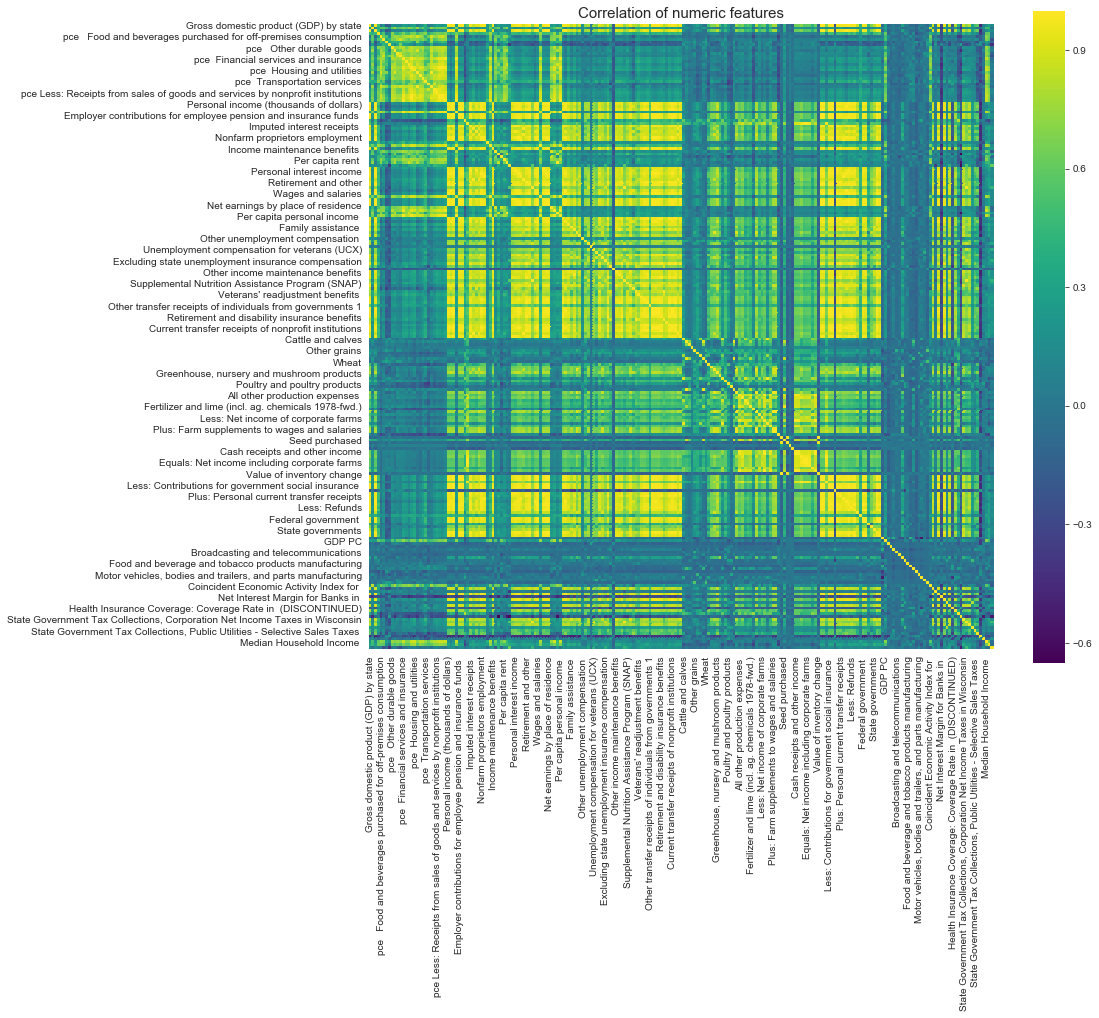

In [131]:
f, ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of numeric features', size = 15)
sns.heatmap(features.corr(), square=True, vmax=1, cmap='viridis')

________

# Running the regressions

## Working with expand establish as target

In [132]:
X = features
y = expand_establish

In [133]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(X))
data_normalized.columns = X.columns

In [134]:
# Create correlation matrix
corr_matrix = data_normalized.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [135]:
X_new = data_normalized.drop(to_drop, axis=1)
X_new.shape

(1000, 75)

In [136]:
# Create and fit selector
selector = SelectKBest(f_regression, k=20)
selector.fit(X_new, y)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [137]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest = X_new.iloc[:,idxs_selected]
X_kbest = sm.add_constant(X_kbest)

In [138]:
# creating a train/test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)

In [139]:
'''
plt.figure(figsize=(15,15))
for i in range(1, 11):
    plt.subplot(5, 2, i)
    sns.distplot(X_kbest.iloc[:,i])
'''


'\nplt.figure(figsize=(15,15))\nfor i in range(1, 11):\n    plt.subplot(5, 2, i)\n    sns.distplot(X_kbest.iloc[:,i])\n'

In [140]:
model = sm.OLS(y, X_kbest).fit()
predictions = model.predict(X_kbest) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       expand_establish   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     675.4
Date:                Fri, 23 Nov 2018   Prob (F-statistic):               0.00
Time:                        08:47:33   Log-Likelihood:                -13963.
No. Observations:                1000   AIC:                         2.797e+04
Df Residuals:                     979   BIC:                         2.807e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
const                                                                        3.108e+05   5.58e+04      5.569      0.000    2.01e+05     4.2e+05
Gross domestic product (GDP) by state                                        6.423e+06   2.86e+05     22.481      0.000    5.86e+06    6.98e+06
pce   Clothing and footwear                                                 -2.591e+05    1.1e+05     -2.352      0.019   -4.75e+05   -4.29e+04
pce  Transportation services                                                -1.742e+04   1.01e+05     -0.173      0.863   -2.15e+05     1.8e+05
Farm proprietors employment                                                  3.835e+05   1.02e+05      3.753      0.000    1.83e+05    5.84e+05
Farm proprietors' income                                                    -4.113e+05   1.41e+05     -2.913      0.004   -6.88e+05   -1.34e+05
Unemployment insurance compensation                                          3.308e+05   1.91e+05      1.728      0.084   -4.49e+04    7.07e+05
Railroad retirement and disability benefits                                  4.966e+05   9.54e+04      5.207      0.000    3.09e+05    6.84e+05
Workers' compensation                                                        5.983e+05   1.18e+05      5.089      0.000    3.68e+05    8.29e+05
Other transfer receipts of individuals from governments 1                   -1.144e+06   1.28e+05     -8.952      0.000    -1.4e+06   -8.93e+05
Sheep and other livestock                                                   -8.231e+04   9.97e+04     -0.826      0.409   -2.78e+05    1.13e+05
Cotton                                                                      -4.497e+05   1.54e+05     -2.918      0.004   -7.52e+05   -1.47e+05
Dairy products                                                                8.15e+05   1.39e+05      5.882      0.000    5.43e+05    1.09e+06
Hay, silage, etc.                                                           -7.218e+05    1.6e+05     -4.512      0.000   -1.04e+06   -4.08e+05
Other crops                                                                  7.942e+04   7.87e+04      1.010      0.313    -7.5e+04    2.34e+05
Other taxes                                                                 -4.776e+05   8.67e+04     -5.510      0.000   -6.48e+05   -3.07e+05
Local governments                                                           -4.728e+05   1.22e+05     -3.872      0.000   -7.12e+05   -2.33e+05
Computer and electronic products manufacturing                               3.384e+05   6.31e+04      5.360      0.000    2.14e+05    4.62e+05
State Government Tax Collections, Public Utilities - Select

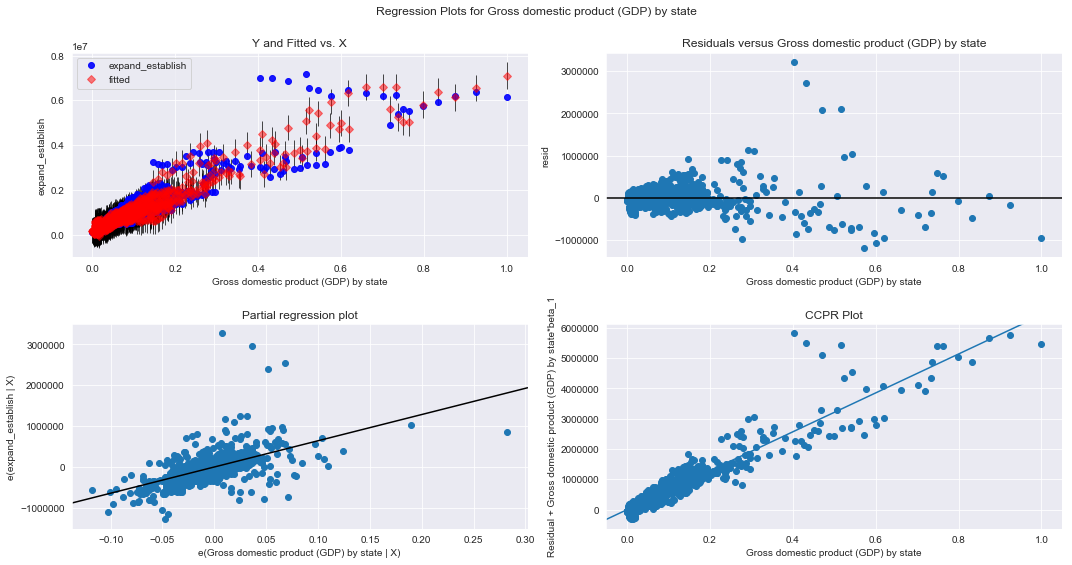

In [141]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(model, "Gross domestic product (GDP) by state", fig=fig)

In [142]:
linear_regression_mse=model.mse_total

In [143]:
vif_df=pd.DataFrame([variance_inflation_factor(X_kbest.values, i) 
               for i in range(X_kbest.shape[1])], 
              index=X_kbest.columns)
vif_df=vif_df.reset_index()
vif_df.columns=['feature_name','vif_value']
vif_df.head(6)

,feature_name,vif_value
0,const,38.770885
1,Gross domestic product (GDP) by state,16.531870
2,pce Clothing and footwear,3.330078
3,pce Transportation services,3.256813
4,Farm proprietors employment,3.222132
5,Farm proprietors' income,2.640216


Text(0,0.5,'residual studentdized')

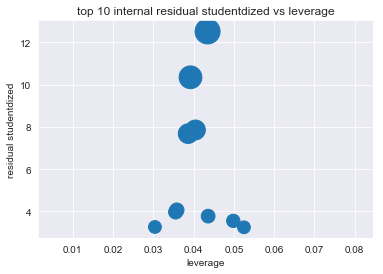

In [144]:
influence = model.get_influence()
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag
top10_index=resid_student.argsort()[-10:]
s = [50*n for n in resid_student[top10_index]]
plt.scatter(leverage[top10_index],resid_student[top10_index],s=s)
plt.title('top 10 internal residual studentdized vs leverage')
plt.xlabel('leverage')
plt.ylabel('residual studentdized')

In [145]:
top10_index=list(top10_index)
y_wf=y.copy()
y_wf=y_wf.loc[~y_wf.index.isin(top10_index)]
X_wf=X_kbest.loc[~X_kbest.index.isin(top10_index)]
model = sm.OLS(y_wf, X_wf).fit()
predictions = model.predict(X_wf) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       expand_establish   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1117.
Date:                Fri, 23 Nov 2018   Prob (F-statistic):               0.00
Time:                        08:47:37   Log-Likelihood:                -13475.
No. Observations:                 990   AIC:                         2.699e+04
Df Residuals:                     969   BIC:                         2.710e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
const                                                                        1.498e+05   3.97e+04      3.772      0.000    7.19e+04    2.28e+05
Gross domestic product (GDP) by state                                        5.868e+06   2.02e+05     28.984      0.000    5.47e+06    6.27e+06
pce   Clothing and footwear                                                 -1.483e+05   7.77e+04     -1.908      0.057   -3.01e+05    4254.725
pce  Transportation services                                                -1.597e+04   7.11e+04     -0.225      0.822   -1.55e+05    1.24e+05
Farm proprietors employment                                                  4.806e+05   7.29e+04      6.590      0.000    3.37e+05    6.24e+05
Farm proprietors' income                                                     -1.84e+05   9.98e+04     -1.844      0.065    -3.8e+05    1.18e+04
Unemployment insurance compensation                                          6.351e+05   1.36e+05      4.676      0.000    3.69e+05    9.02e+05
Railroad retirement and disability benefits                                  3.509e+05   6.76e+04      5.191      0.000    2.18e+05    4.84e+05
Workers' compensation                                                        5.898e+05   8.28e+04      7.124      0.000    4.27e+05    7.52e+05
Other transfer receipts of individuals from governments 1                   -6.831e+05   9.14e+04     -7.477      0.000   -8.62e+05   -5.04e+05
Sheep and other livestock                                                   -1.907e+05   7.05e+04     -2.706      0.007   -3.29e+05   -5.24e+04
Cotton                                                                      -6.889e+05    1.1e+05     -6.282      0.000   -9.04e+05   -4.74e+05
Dairy products                                                               5.611e+05    9.8e+04      5.724      0.000    3.69e+05    7.53e+05
Hay, silage, etc.                                                           -5.378e+05   1.13e+05     -4.751      0.000    -7.6e+05   -3.16e+05
Other crops                                                                  5.318e+04   5.55e+04      0.959      0.338   -5.57e+04    1.62e+05
Other taxes                                                                 -3.478e+05   6.12e+04     -5.687      0.000   -4.68e+05   -2.28e+05
Local governments                                                           -3.524e+05   8.64e+04     -4.081      0.000   -5.22e+05   -1.83e+05
Computer and electronic products manufacturing                                1.35e+05    4.5e+04      2.998      0.003    4.66e+04    2.23e+05
State Government Tax Collections, Public Utilities - Select

In [146]:
linear_regression_mse_outlier_removed=model.mse_total

## residual distributions

In [147]:
pred_val = model.fittedvalues.copy()
true_val = y_wf.values.copy()
residual=pred_val-true_val


Text(0.5,1,'residual distribution for regression')

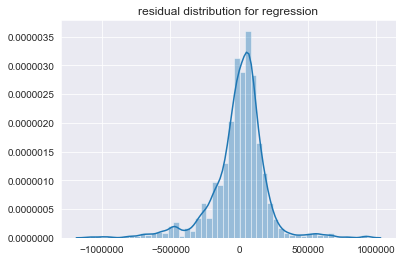

In [148]:
sns.distplot(residual)
plt.title('residual distribution for regression')

In [149]:
from scipy import stats
stats.kstest(residual, 'norm')


KstestResult(statistic=0.5696969696969697, pvalue=0.0)

## lasso


In [152]:
from sklearn.model_selection import GridSearchCV
param_grid = {
                'alpha':[50,100,300,500,700,1000]
             }
lasso=linear_model.Lasso()
grid_clf = GridSearchCV(lasso, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'alpha': [50, 100, 300, 500, 700, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [153]:
grid_clf.best_params_

{'alpha': 50}

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
lasso=linear_model.Lasso(alpha=300)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
from sklearn.metrics import mean_squared_error
mse_lasso=mean_squared_error(y_pred,y_test)
print('mse of lasso:',mse_lasso)

mse of lasso: 54958305930.8


In [155]:
coef_dict = {}
for coef, feat in zip(lasso.coef_,X_train.columns):
    if coef!=0:
        coef_dict[feat] = coef
    else:
        pass

In [203]:
coef=pd.DataFrame(coef_dict,index=[0]).T
coef=coef.reset_index()
coef.columns=['feature name','coef']
coef.head(6)

,feature name,coef
0,Gross domestic product (GDP) by state,4.567323e+06
1,Quantity indexes for real GDP by state,-2.677560e+05
2,pce Clothing and footwear,4.937603e+05
3,pce Food and beverages purchased for off-pre...,-1.295891e+05
4,pce Furnishings and durable household equipment,-1.489455e+05
5,pce Gasoline and other energy goods,4.180745e+05


,feature name,coef
0,Gross domestic product (GDP) by state,4.567323e+06
1,Quantity indexes for real GDP by state,-2.677560e+05
2,pce Clothing and footwear,4.937603e+05
3,pce Food and beverages purchased for off-pre...,-1.295891e+05
4,pce Furnishings and durable household equipment,-1.489455e+05
5,pce Gasoline and other energy goods,4.180745e+05
6,pce Motor vehicles and parts,-3.908453e+05
7,pce Other durable goods,-3.541058e+05
8,pce Other nondurable goods,-3.162876e+05
9,pce Recreational goods and vehicles,4.376450e+05


In [159]:
mse_name_list=['mse of linear regression','mse of linear regression(outlier points removed)','mse of lasso']
mse_list=[linear_regression_mse,linear_regression_mse_outlier_removed,mse_lasso]
mse_df=pd.DataFrame({'model':mse_name_list,'mse':mse_list})

In [200]:
mse_df

,model,mse
0,mse of linear regression,1.164737e+12
1,mse of linear regression(outlier points removed),9.373018e+11
2,mse of lasso,5.495831e+10


### Using Decision Tree Regressor

In [202]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
treeReg = DecisionTreeRegressor(random_state=0, max_depth=5)
modelRegTree = treeReg.fit(X_train, y_train)
print('Train Score:', treeReg.score(X_train, y_train))
print('Test Score:', treeReg.score(X_test, y_test))

Train Score: 0.832498157699
Test Score: -0.0347979676423


In [201]:

features_list = X_kbest.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(5)

Train Score: 0.832498157699
Test Score: -0.0347979676423


,Feature,importance
1,Gross domestic product (GDP) by state,0.378641
37,Leading Index for,0.310249
19,Sheep and other livestock,0.083585
40,"State Government Tax Collections, Public Utili...",0.066942
20,Sorghum,0.054350


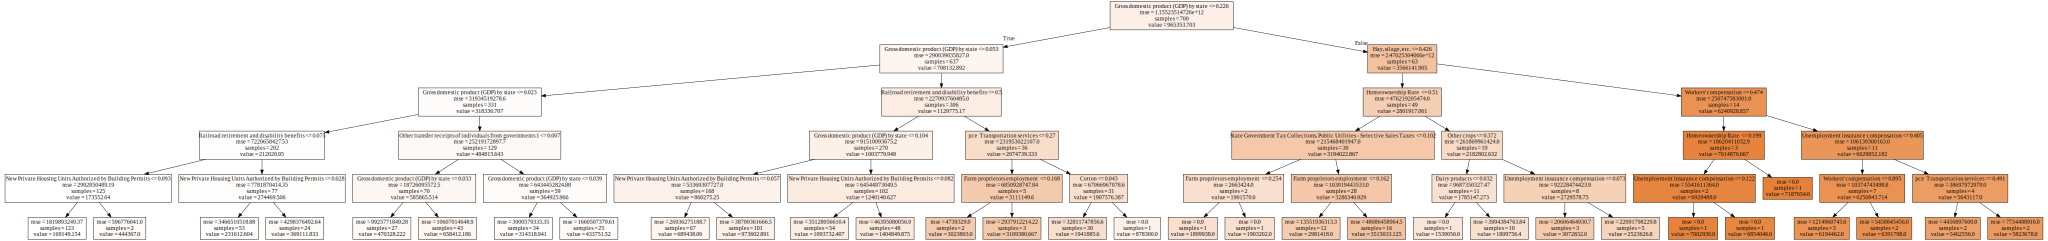

In [160]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(treeReg, out_file=None
   , feature_names=X_kbest.columns
   , filled = True))
display(SVG(graph.pipe(format='svg')))


## Using XGBoost Regressor

In [161]:
import xgboost
import shap
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
shap.initjs()

In [162]:
xgb = XGBRegressor()
regressor = xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.99169177088188454

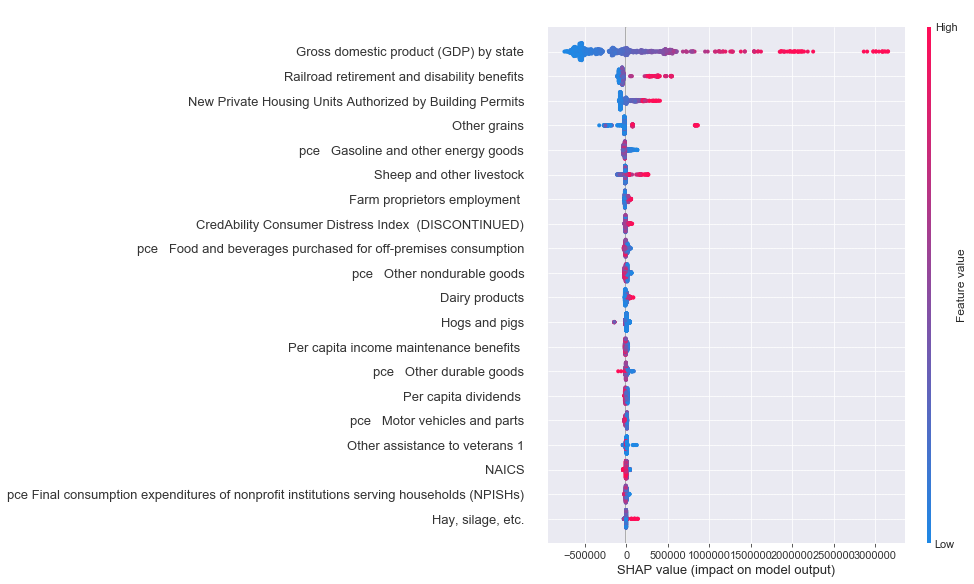

In [163]:
import shap
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

## Working with Open Establish

In [164]:
X = features.drop(["Veterans' life insurance benefits", 'Wage and salary employment', 'Population (persons) ',
                   'Total employment', 'Personal interest income',
                  'Total employment (number of jobs)', 'Monetary interest receipts', 'Real GDP by state'], axis=1)
y = np.log(open_establish)

In [165]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(X))
data_normalized.columns = X.columns

In [166]:
# Create correlation matrix
corr_matrix = data_normalized.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [167]:
X_new = data_normalized.drop(to_drop, axis=1)
X_new.shape

(1000, 75)

In [168]:
# Create and fit selector
selector = SelectKBest(f_regression, k=25)
selector.fit(X_new, y)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [169]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest = X_new.iloc[:,idxs_selected]
X_kbest = sm.add_constant(X_kbest)

In [170]:
# creating a train/test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)

In [171]:
model = sm.OLS(y, X_kbest).fit()
predictions = model.predict(X_kbest) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         open_establish   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     286.2
Date:                Fri, 23 Nov 2018   Prob (F-statistic):               0.00
Time:                        08:47:40   Log-Likelihood:                -348.38
No. Observations:                1000   AIC:                             748.8
Df Residuals:                     974   BIC:                             876.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       11.0852      0.076    146.370      0.000      10.937      11.234
Gross domestic product (GDP) by state                                                        1.6559      0.371      4.466      0.000       0.928       2.384
pce   Clothing and footwear                                                                  0.7961      0.147      5.399      0.000       0.507       1.086
pce   Food and beverages purchased for off-premises consumption                             -0.5340      0.119     -4.502      0.000      -0.767      -0.301
pce   Gasoline and other energy goods                                                       -1.0378      0.123     -8.417      0.000      -1.280      -0.796
pce  Transportation services                                                                 1.5222      0.152     10.037      0.000       1.225       1.820
pce Final consumption expenditures of nonprofit institutions serving households (NPISHs)    -1.4345      0.127    -11.287      0.000      -1.684      -1.185
Farm proprietors employment                                                                  0.7820      0.137      5.724      0.000       0.514       1.050
Farm proprietors' income                                                                    -1.1605      0.191     -6.075      0.000      -1.535      -0.786
Unemployment insurance compensation                                                          1.7099      0.237      7.216      0.000       1.245       2.175
Railroad retirement and disability benefits                                                  1.3541      0.119     11.391      0.000       1.121       1.587
Workers' compensation                                                                        0.4715      0.144      3.265      0.001       0.188       0.755
Other transfer receipts of individuals from governments 1                                   -0.3097      0.163     -1.902      0.058      -0.629       0.010
Sheep and other livestock                                                                   -0.0737      0.125     -0.590      0.555      -0.319       0.172
Cotton                                                                                      -1.7789      0.217     -8.193      0.000      -2.205      -1.353
Dairy products                                                                               0.8040      0.172      4.664      0.000       0.466       1.142
Hay, silage, etc.                                                                           -0.7999 

In [172]:
from sklearn.tree import DecisionTreeRegressor
treeReg = DecisionTreeRegressor(random_state=0, max_depth=5)
modelRegTree = treeReg.fit(X_train, y_train)
print('Train Score:', treeReg.score(X_train, y_train))
print('Test Score:', treeReg.score(X_test, y_test))

Train Score: 0.962013187798
Test Score: 0.920976445104


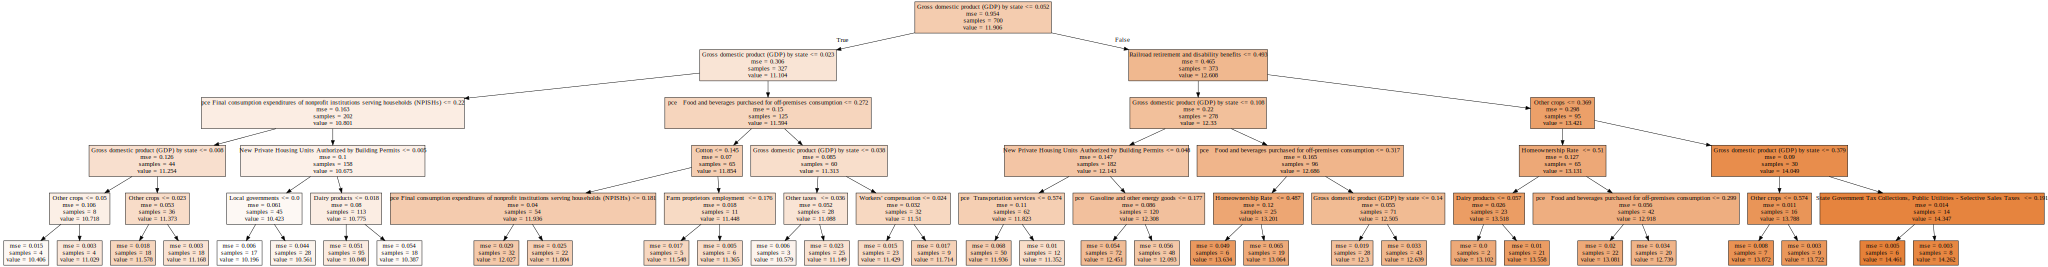

In [173]:
graph = Source(tree.export_graphviz(treeReg, out_file=None
   , feature_names=X_kbest.columns
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [174]:
features_list = X_kbest.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(5)

,Feature,importance
1,Gross domestic product (GDP) by state,0.733065
10,Railroad retirement and disability benefits,0.130975
17,Other crops,0.030642
3,pce Food and beverages purchased for off-pre...,0.030046
24,New Private Housing Units Authorized by Buildi...,0.021118


In [175]:
xgb = XGBRegressor()
regressor = xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.97707938878388734

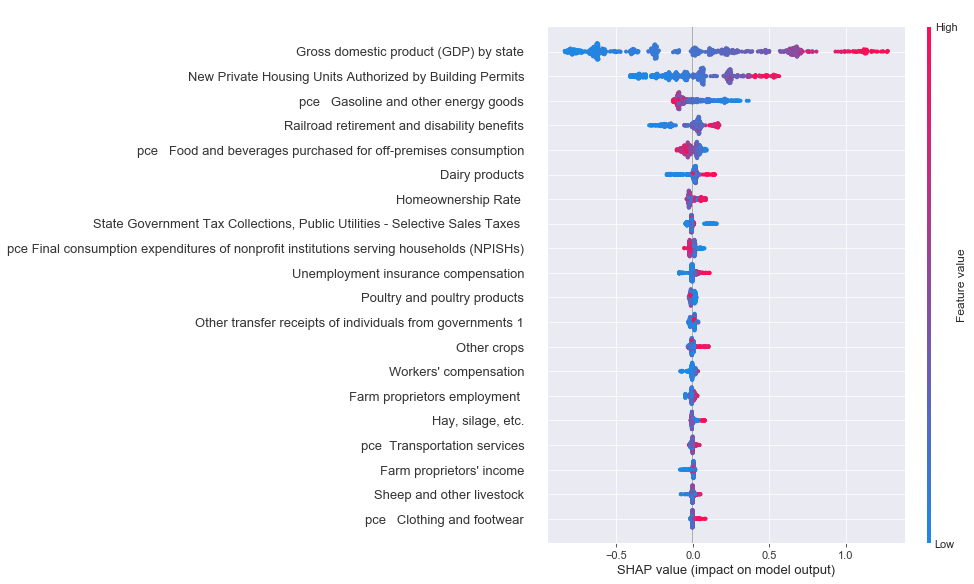

In [176]:
import shap
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

## Working with End Establish

In [177]:
X = features.drop(["Veterans' life insurance benefits", 'Wage and salary employment', 'Population (persons) ',
                   'Total employment', 'Personal interest income',
                  'Total employment (number of jobs)', 'Monetary interest receipts', 'Real GDP by state'], axis=1)
y = end_establish

In [178]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(X))
data_normalized.columns = X.columns

In [179]:
# Create correlation matrix
corr_matrix = data_normalized.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [180]:
X_new = data_normalized.drop(to_drop, axis=1)
X_new.shape

(1000, 75)

In [181]:
# Create and fit selector
selector = SelectKBest(f_regression, k=45)
selector.fit(X_new, y)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [182]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest = X_new.iloc[:,idxs_selected]
X_kbest = sm.add_constant(X_kbest)

In [183]:
# creating a train/test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)

In [184]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          end_establish   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     112.4
Date:                Fri, 23 Nov 2018   Prob (F-statistic):          1.37e-275
Time:                        08:47:42   Log-Likelihood:                -9034.8
No. Observations:                 700   AIC:                         1.816e+04
Df Residuals:                     654   BIC:                         1.837e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================================
                                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                           1.144e+05   7.08e+04      1.616      0.107   -2.46e+04    2.53e+05
Gross domestic product (GDP) by state                                                           1.426e+06   1.47e+05      9.703      0.000    1.14e+06    1.71e+06
pce   Clothing and footwear                                                                     4051.1126   6.48e+04      0.062      0.950   -1.23e+05    1.31e+05
pce   Food and beverages purchased for off-premises consumption                                -2.687e+04   6.05e+04     -0.444      0.657   -1.46e+05     9.2e+04
pce   Gasoline and other energy goods                                                           7.936e+04   5.85e+04      1.357      0.175   -3.55e+04    1.94e+05
pce   Motor vehicles and parts                                                                 -1.766e+05   4.96e+04     -3.561      0.000   -2.74e+05   -7.92e+04
pce   Other nondurable goods                                                                   -1.437e+05   4.71e+04     -3.052      0.002   -2.36e+05   -5.12e+04
pce  Transportation services                                                                    1.404e+05    6.8e+04      2.064      0.039    6825.179    2.74e+05
pce Final consumption expenditures of nonprofit institutions serving households (NPISHs)       -6.329e+04   5.68e+04     -1.114      0.266   -1.75e+05    4.83e+04
Farm proprietors employment                                                                     -4.62e+04   5.81e+04     -0.795      0.427    -1.6e+05    6.79e+04
Farm proprietors' income                                                                       -7030.5993   8.12e+04     -0.087      0.931   -1.67e+05    1.52e+05
Average nonfarm proprietors' income                                                              985.0433   4.18e+04      0.024      0.981   -8.11e+04     8.3e+04
Per capita interest                                                                             6.863e+04   5.46e+04      1.257      0.209   -3.86e+04    1.76e+05
Unemployment insurance compensation                                                             2.931e+05   1.02e+05      2.865      0.004    9.22e+04    4.94e+05
Other unemployment compensation                                                                -1.071e+05   3.33e+04     -3.212      0.001   -1.73e+05   -4.16e+04
Railroad retirement and disability benefits                                                     8.585e+04   4.77e+04      1.800      0.072   -7801.79

In [185]:
from sklearn.tree import DecisionTreeRegressor
treeReg = DecisionTreeRegressor(random_state=0, max_depth=10)
modelRegTree = treeReg.fit(X_train, y_train)
print('Train Score:', treeReg.score(X_train, y_train))
print('Test Score:', treeReg.score(X_test, y_test))

Train Score: 0.99947183559
Test Score: 0.951340165323


In [186]:
features_list = X_kbest.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(5)

,Feature,importance
1,Gross domestic product (GDP) by state,0.713186
34,Computer and electronic products manufacturing,0.142913
42,New Private Housing Units Authorized by Buildi...,0.052724
3,pce Food and beverages purchased for off-pre...,0.034680
41,"State Government Tax Collections, Public Utili...",0.011165


In [187]:
xgb = XGBRegressor()
regressor = xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.97668918103367008

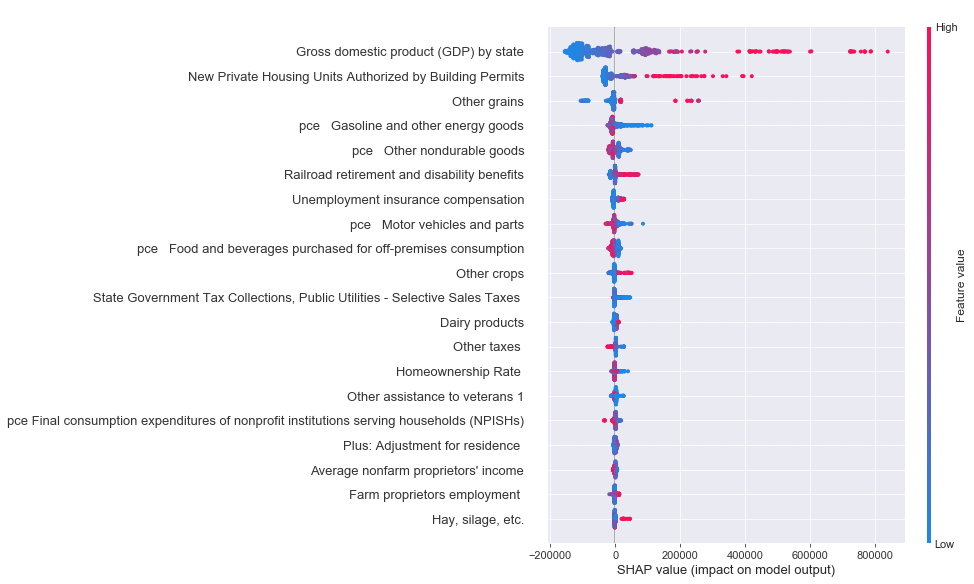

In [188]:
import shap
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

## Working with Net Change

In [189]:
X = features
y = net_change

In [190]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(X))
data_normalized.columns = X.columns

In [191]:
# Create correlation matrix
corr_matrix = data_normalized.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [192]:
X_new = data_normalized.drop(to_drop, axis=1)
X_new.shape

(1000, 75)

In [193]:
# Create and fit selector
selector = SelectKBest(f_regression, k=45)
selector.fit(X_new, y)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [194]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest = X_new.iloc[:,idxs_selected]
X_kbest = sm.add_constant(X_kbest)

In [195]:
# creating a train/test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)

In [196]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             net_change   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     21.51
Date:                Fri, 23 Nov 2018   Prob (F-statistic):          1.67e-100
Time:                        08:47:44   Log-Likelihood:                -9069.1
No. Observations:                 700   AIC:                         1.823e+04
Df Residuals:                     654   BIC:                         1.844e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================================
                                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                          -5.651e+05   9.61e+04     -5.882      0.000   -7.54e+05   -3.76e+05
Gross domestic product (GDP) by state                                                            5.23e+04   1.36e+05      0.386      0.700   -2.14e+05    3.18e+05
pce   Clothing and footwear                                                                     1.057e+05   6.49e+04      1.628      0.104   -2.18e+04    2.33e+05
pce   Food and beverages purchased for off-premises consumption                                 1.058e+05    5.8e+04      1.824      0.069   -8068.525     2.2e+05
pce   Furnishings and durable household equipment                                                1.96e+04   6.64e+04      0.295      0.768   -1.11e+05     1.5e+05
pce   Gasoline and other energy goods                                                          -3.434e+04   6.76e+04     -0.508      0.612   -1.67e+05    9.85e+04
pce   Motor vehicles and parts                                                                 -2.885e+04      6e+04     -0.481      0.631   -1.47e+05     8.9e+04
pce  Transportation services                                                                   -2372.8442   7.33e+04     -0.032      0.974   -1.46e+05    1.42e+05
pce Final consumption expenditures of nonprofit institutions serving households (NPISHs)       -1.616e+05   5.89e+04     -2.743      0.006   -2.77e+05   -4.59e+04
Farm proprietors employment                                                                     -1.01e+05    5.8e+04     -1.740      0.082   -2.15e+05     1.3e+04
Farm proprietors' income                                                                        3.126e+05   8.58e+04      3.643      0.000    1.44e+05    4.81e+05
Average nonfarm proprietors' income                                                            -3.031e+04    4.5e+04     -0.674      0.501   -1.19e+05     5.8e+04
Per capita dividends                                                                            1.665e+04   5.98e+04      0.279      0.781   -1.01e+05    1.34e+05
Per capita income maintenance benefits                                                          1.344e+05   4.43e+04      3.037      0.002    4.75e+04    2.21e+05
Per capita unemployment insurance compensation                                                 -1.235e+05   6.18e+04     -1.998      0.046   -2.45e+05   -2097.825
Railroad retirement and disability benefits                                                     6.279e+04   5.16e+04      1.217      0.224   -3.85e+0

In [197]:
from sklearn.tree import DecisionTreeRegressor
treeReg = DecisionTreeRegressor(random_state=0, max_depth=10)
modelRegTree = treeReg.fit(X_train, y_train)
print('Train Score:', treeReg.score(X_train, y_train))
print('Test Score:', treeReg.score(X_test, y_test))

Train Score: 0.983948162986
Test Score: -0.0193316158411


In [198]:
features_list = X_kbest.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(5)

,Feature,importance
1,Gross domestic product (GDP) by state,0.326248
37,Leading Index for,0.266287
19,Sheep and other livestock,0.070838
40,"State Government Tax Collections, Public Utili...",0.066673
42,Homeownership Rate,0.047659


In [199]:
xgb = XGBRegressor()
regressor = xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.32004930832414069